# Other generative models
## Auto-regresive models
An auto-regresive model uses the same input as output. In this way, the internal structure of inputs can be learned.

One very simple example is the Auto-Encoder with MSE loss:
- This model reduces the input image size to a latent representation using convolutional layers and reconstructs it using transpose convolutions. 
- The reconstruction is trained using Mean Squared Error (MSE) loss to minimize the pixel-wise difference between the input and output images.

In [205]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [206]:
# Define the Auto-Encoder model
class ConvAutoEncoder(nn.Module):
    def __init__(self, latent_dim=16):
        super(ConvAutoEncoder, self).__init__()
        # Encoder: Reduces image to latent representation
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28 -> 14x14
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14 -> 7x7
            nn.LeakyReLU(),
            nn.Flatten(),
            nn.Linear(32 * 7 * 7, latent_dim),  # Latent representation
        )
        # Decoder: Reconstructs image from latent representation
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32 * 7 * 7),
            nn.Unflatten(1, (32, 7, 7)),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7 -> 14x14
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14 -> 28x28
            # nn.Sigmoid()  # Output pixel values in range [0, 1]
        )

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed



In [207]:
# Data preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

In [208]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [265]:
# Model, loss, and optimizer
latent_dim = 128
model = ConvAutoEncoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)


In [267]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for images, _ in dataloader:
        images_dev = images.to(device)
        optimizer.zero_grad()
        outputs = model(images_dev)
        loss = criterion(outputs, images_dev)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Save the model
torch.save(model.state_dict(), 'models/conv_autoencoder.pth')


Epoch [1/1], Loss: 0.0335


In [62]:
x, y = dataset[0]
x.shape

torch.Size([1, 28, 28])

Loss: 0.007613813038915396


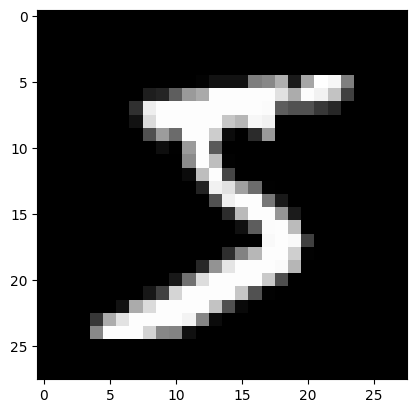

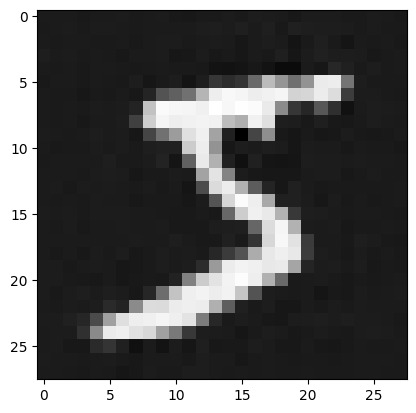

In [ ]:
model.eval()
with torch.no_grad():
    image = model(x.unsqueeze(0).to(device))
print("Loss:", criterion(image.squeeze(0), x.to(device)).item())
plt.imshow(x.squeeze().cpu(), cmap='gray')
plt.show()
plt.imshow(image[0].squeeze().cpu(), cmap='gray')
plt.show()

In [79]:
# Model, loss, and optimizer
latent_dim = 32
model2 = ConvAutoEncoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=1e-2)

In [80]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model2.train()
    epoch_loss = 0
    for images, _ in dataloader:
        images_dev = images.to(device)
        optimizer.zero_grad()
        outputs = model2(images_dev)
        loss = criterion(outputs, images_dev)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Save the model
torch.save(model2.state_dict(), 'models/conv_autoencoder32.pth')


Epoch [1/10], Loss: 0.1019
Epoch [2/10], Loss: 0.0375
Epoch [3/10], Loss: 0.0331
Epoch [4/10], Loss: 0.0303
Epoch [5/10], Loss: 0.0291
Epoch [6/10], Loss: 0.0285
Epoch [7/10], Loss: 0.0281
Epoch [8/10], Loss: 0.0277
Epoch [9/10], Loss: 0.0281
Epoch [10/10], Loss: 0.0263


Loss: 0.05157369375228882


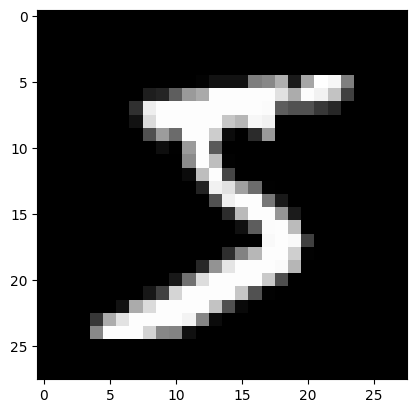

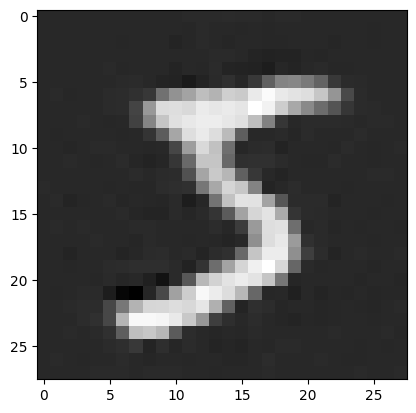

In [137]:
model2.eval()
with torch.no_grad():
    image = model2(x.unsqueeze(0).to(device))
image.shape
print("Loss:", criterion(image.squeeze(0), x.to(device)).item())
plt.imshow(x.squeeze().cpu(), cmap='gray')
plt.show()
plt.imshow(image[0].squeeze().cpu(), cmap='gray')
plt.show()

In [84]:
# Model, loss, and optimizer
latent_dim = 8
model3 = ConvAutoEncoder(latent_dim=latent_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model3.parameters(), lr=1e-2)

In [85]:
# Training loop
epochs = 10
for epoch in range(epochs):
    model3.train()
    epoch_loss = 0
    for images, _ in dataloader:
        images_dev = images.to(device)
        optimizer.zero_grad()
        outputs = model3(images_dev)
        loss = criterion(outputs, images_dev)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(dataloader):.4f}")

# Save the model
torch.save(model3.state_dict(), 'models/conv_autoencoder8.pth')


Epoch [1/10], Loss: 0.1489
Epoch [2/10], Loss: 0.1067
Epoch [3/10], Loss: 0.0989
Epoch [4/10], Loss: 0.0964
Epoch [5/10], Loss: 0.0944
Epoch [6/10], Loss: 0.1310
Epoch [7/10], Loss: 0.1035
Epoch [8/10], Loss: 0.0997
Epoch [9/10], Loss: 0.0972
Epoch [10/10], Loss: 0.0955


Loss: 0.19660454988479614


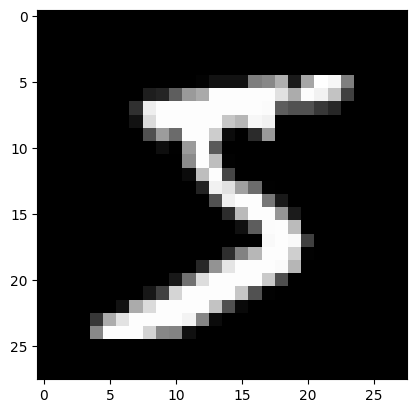

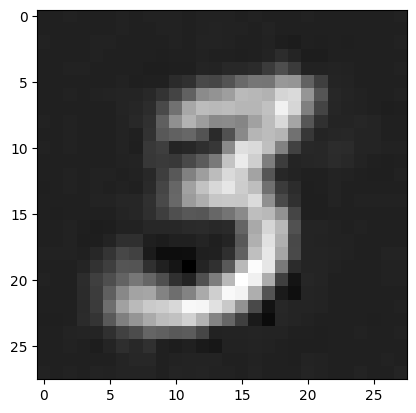

In [138]:
model3.eval()
with torch.no_grad():
    image = model3(x.unsqueeze(0).to(device))
image.shape
print("Loss:", criterion(image.squeeze(0), x.to(device)).item())
plt.imshow(x.squeeze().cpu(), cmap='gray')
plt.show()
plt.imshow(image[0].squeeze().cpu(), cmap='gray')
plt.show()

Posibles usos:
- Mejoramiento de imágenes
- Clasificación de imágenes
- ...

Loss: 0.03526846319437027


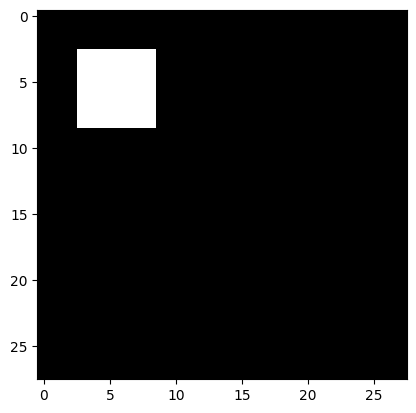

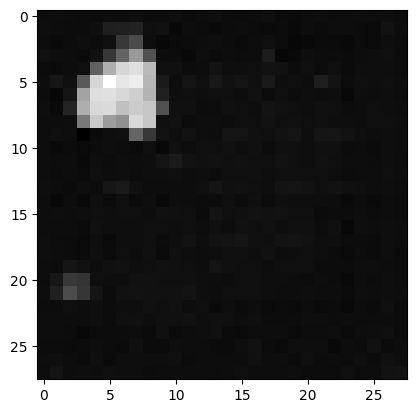

In [140]:
model.eval()
other_img = np.zeros((28, 28), dtype=np.uint8)
other_img[3:9, 3:9] = 255
with torch.no_grad():
    q = transform(other_img).to(device)
    image = model(q.unsqueeze(0))
print("Loss:", criterion(image.squeeze(0), q).item())
plt.imshow(other_img, cmap='gray')
plt.show()
plt.imshow(image.squeeze().cpu(), cmap='gray')
plt.show()

Loss: 0.0018007700564339757


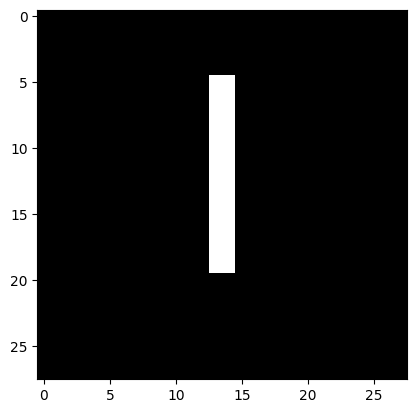

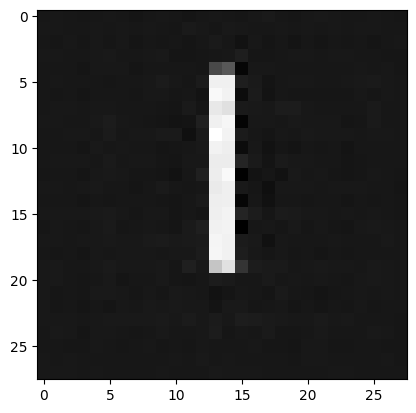

In [ ]:
other_img = np.zeros((28, 28), dtype=np.uint8)
other_img[5:20, 13:15] = 255
with torch.no_grad():
    q = transform(other_img).to(device)
    image = model(q.unsqueeze(0))
print("Loss:", criterion(image.squeeze(0), q).item())
plt.imshow(other_img, cmap='gray')
plt.show()
plt.imshow(image.squeeze().cpu(), cmap='gray')
plt.show()

Loss: 0.045892275869846344


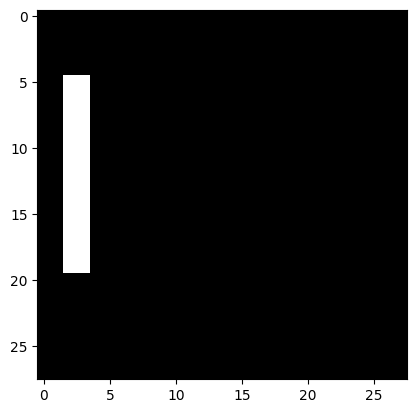

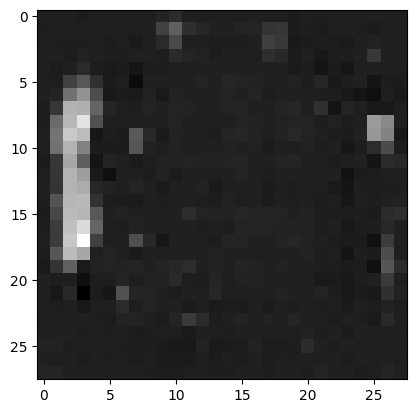

In [142]:
other_img = np.zeros((28, 28), dtype=np.uint8)
other_img[5:20, 2:4] = 255
with torch.no_grad():
    q = transform(other_img).to(device)
    image = model(q.unsqueeze(0))
print("Loss:", criterion(image.squeeze(0), q).item())
plt.imshow(other_img, cmap='gray')
plt.show()
plt.imshow(image.squeeze().cpu(), cmap='gray')
plt.show()

NOTE: Autoencoders like those are hard to use for generating new images. Why?

## Variational Autoencoder (VAE)
VAE Encodes images into a latent space, then decodes them to reconstruct the original images or generate new images by sampling from the latent space.

In [201]:
class SimpleVAE(nn.Module):
    def __init__(self, latent_dim=32):
        super(SimpleVAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),  # 28x28 -> 14x14
            nn.LeakyReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),  # 14x14 -> 7x7
            nn.LeakyReLU(),
            nn.Flatten()
        )

        self.fc_mu = nn.Linear(32 * 7 * 7, latent_dim)
        self.fc_logvar = nn.Linear(32 * 7 * 7, latent_dim)

        # Decoder
        self.fc_decoder = nn.Linear(latent_dim, 32 * 7 * 7)
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (32, 7, 7)),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),  # 7x7 -> 14x14
            nn.LeakyReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),  # 14x14 -> 28x28
            # nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        encoded = self.encoder(x)
        mu = self.fc_mu(encoded)
        logvar = self.fc_logvar(encoded)
        z = self.reparameterize(mu, logvar)
        decoded = self.decoder(self.fc_decoder(z))
        return decoded, mu, logvar

def initialize_weights(model):
    for m in model.modules():
        if isinstance(m, nn.Conv2d) or isinstance(m, nn.ConvTranspose2d):
            # Use He initialization for convolutional layers
            nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            # Use Xavier initialization for fully connected layers
            nn.init.xavier_normal_(m.weight)
            if m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.BatchNorm2d):
            # For batch norm, set weights to 1 and biases to 0
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)

def vae_loss(reconstructed, original, mu, logvar):
    # Reconstruction loss
    recon_loss = nn.functional.mse_loss(reconstructed, original, reduction='sum')
    # KL divergence
    kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_loss


In [202]:
# Data pipeline
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

In [212]:
# Model, optimizer, and training
latent_dim = 128
model = SimpleVAE(latent_dim).to(device)
initialize_weights(model)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [217]:
epochs = 20
model.train()
for epoch in range(epochs):
    total_loss = 0
    for images, _ in dataloader:
        images = images.to(device)

        optimizer.zero_grad()
        reconstructed, mu, logvar = model(images)
        loss = vae_loss(reconstructed, images, mu, logvar)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(dataset):.4f}")

Epoch 1/20, Loss: 72.2678
Epoch 2/20, Loss: 72.1962
Epoch 3/20, Loss: 72.1429
Epoch 4/20, Loss: 72.0749
Epoch 5/20, Loss: 71.9808
Epoch 6/20, Loss: 71.9126
Epoch 7/20, Loss: 71.8168
Epoch 8/20, Loss: 71.8185
Epoch 9/20, Loss: 71.7492
Epoch 10/20, Loss: 71.7399
Epoch 11/20, Loss: 71.6476
Epoch 12/20, Loss: 71.6225
Epoch 13/20, Loss: 71.6011
Epoch 14/20, Loss: 71.5721
Epoch 15/20, Loss: 71.4896
Epoch 16/20, Loss: 71.4652
Epoch 17/20, Loss: 71.3825
Epoch 18/20, Loss: 71.3660
Epoch 19/20, Loss: 71.3510
Epoch 20/20, Loss: 71.3086


In [242]:
def plot_tensor_grid(tensor_list, n, m, factor=2):
    fig, axes = plt.subplots(n, m, figsize=(m * factor, n * factor))  # Adjust figure size as needed
    
    for idx, ax in enumerate(axes.flat):  # Flatten the grid of axes
        if idx < len(tensor_list):
            tensor = tensor_list[idx]
            if tensor.dim() == 3:  # Convert (C, H, W) to (H, W) if grayscale
                tensor = tensor.squeeze(0) if tensor.size(0) == 1 else tensor.permute(1, 2, 0)
            ax.imshow(tensor.numpy(), cmap='gray' if tensor.dim() == 2 else None)
            ax.axis('off')  # Turn off axes for cleaner visualization
        else:
            ax.axis('off')  # Turn off any unused subplots

    plt.tight_layout()
    plt.show()


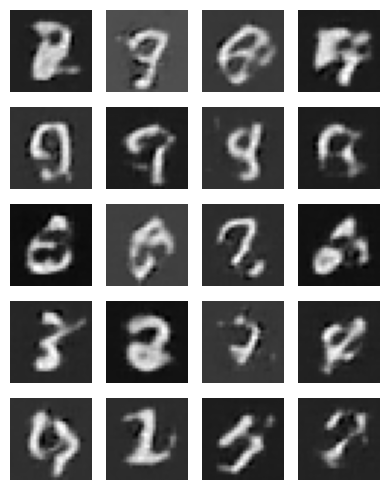

In [245]:
model.eval()  # Set the model to evaluation mode
num_images = 20

# Sample random latent vectors from N(0, 1)
with torch.no_grad():
    z = torch.randn(num_images, latent_dim).to(device)  # Random latent vectors
    generated_images = [img.cpu() for img in model.decoder(model.fc_decoder(z))] # Decode latent vectors

plot_tensor_grid(generated_images, 5, 4, 1)
